# Telco Customers Churn Analysis and Prediction
_______________________________________



## Overview

Customer churn occurs when a customer (player, subscriber, user, etc.) ceases his or her relationship with a company. 

The ability to predict that a customer is at a high risk of churning, while there is still time to do something about it, represents a huge additional potential revenue source for every business. 

The full cost of a churning customer includes both lost revenue, marketing costs involved with replacing those customers with new ones and that the costs of initially acquiring that customer may not have already been covered by the customer’s spending to date. It is always more difficult and expensive to acquire a new customer than it is to retain a current paying customer.

Businesses that fail to address churn suffer further debilitating consequences in reduced attractiveness to investors and doubts about their future viability. It’s essential to measure, monitor, and reduce churn. Reducing churn is a key business goal of every business.

In order to succeed at retaining customers, the business must be able to 
(a) predict in advance which customers will churn; and 
(b) know which actions will have the greatest retention on each particular customer. 

So the main objectives of this project will be to use Machine Learning techniques to classify ‘churning’ customers and their attributes for a given business dataset.


## Problem Statement
Every business has customers that cease doing business with them. Failing to deal with churning customers has major consequences on a business, so the ability to predict and inhibit these customers from leaving is a must.

The business goal of this exercise is to apply Machine Learning techniques to:
* Analyze customer specific data to understand who could be the next potential customers to leave the business. 
* Find what attributes contribute to the higher churn rate of customers and what could be some of the solutions to address this.


## Dataset
For this project we will use a dataset called Telco Customer Churn dataset from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) provided as a CSV file.

This dataset contains a total of 7043 rows. Each row is unique for a customer and is identified using customerID. The target column for classification is ‘Churn’. 


The dataset contain total 21 columns whose details are listed below:

* CustomerID - Customer ID
* Gender - Customer gender (female, male)
* SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
* Partner -Whether the customer has a partner or not (Yes, No)
* Dependents - Whether the customer has dependents or not (Yes, No)
* tenure - Number of months the customer has stayed with the company
* PhoneService - Whether the customer has a phone service or not (Yes, No)
* MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies -Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract - The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod -The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - The amount charged to the customer monthly
* TotalCharges -The total amount charged to the customer
* Churn - Whether the customer churned or not (Yes or No)

Assumptions made :
* The sample data is correct representation of the entire population and is randomly selected
* The columns in the dataset are exhaustive list of features that determine churn rate


## Metrics
The evaluation metric for this problem will be accuracy score. 

When tuning the model we will factor in precision and recall to limit the number of false negatives and positives.
___

## 1. Libraries

In [1]:
!pip3 install seaborn
!pip install --upgrade pip

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages (20.0.2)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")

In [3]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'red', label= 'Churn: No', shade= True)
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'green', label= 'Churn: Yes', shade= True)

In [4]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

This dataset has 16 categorical features:

* Six binary features (Yes/No)
* Nine features with three unique values each (categories)
* One feature with four unique values

## 1.1 Clean up the data

Total charges is string file and need to be converted to numeric.

In [7]:
# Convert Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().values.any()

True

In [8]:
# calculate number of null values
nan_column = df.columns.get_loc("TotalCharges")
print(nan_column)

19


In [9]:
# Impute the missing values in TotalCharges

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy="mean")

df.iloc[:, nan_column] = imp.fit_transform(df.iloc[:, nan_column].values.reshape(-1, 1))
df.iloc[:, nan_column] = pd.Series(df.iloc[:, nan_column])

In [10]:
# make sure no more null values
df.isnull().values.any()

False

<h3>1.2 Churn</h3>

We are trying to predict if a customer left the company in the previous month. Therefore we have a binary classification problem:

In [11]:
# % churned customers
print("Churn customer %: ")
churn = df['Churn'].value_counts('No')*100
churn.round(1)

Churn customer %: 


No     73.5
Yes    26.5
Name: Churn, dtype: float64

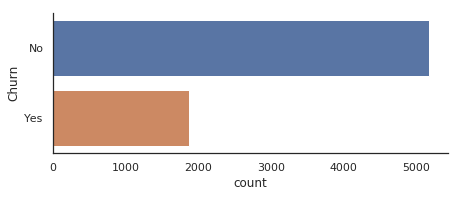

In [12]:
# visualise churn
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

Plot the correlation of churn with other variables

In [13]:
# drop customerID so we can plot correlation
df2 = df.drop(['customerID'],axis=1)

# convert the predictor variable to a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

# convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


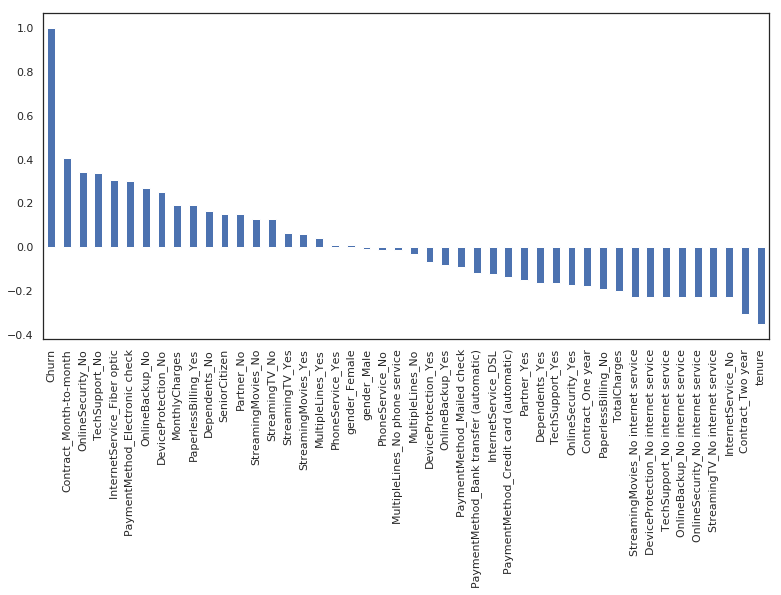

In [14]:
plt.figure(figsize=(13,6))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

<h2>2. Categorical features</h2>



<h3>2.1 Gender and Age (SeniorCitizen)</h3>

Text(0.5, 1.0, '% of Senior Citizens')

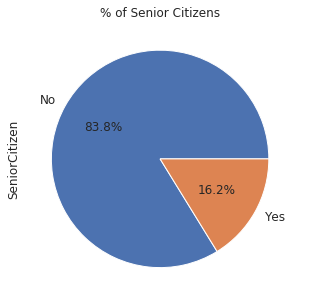

In [15]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
                    .plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens', fontsize = 12)

There are only 16% of the customers who are senior citizens. Of those 16% which are likely to churn.

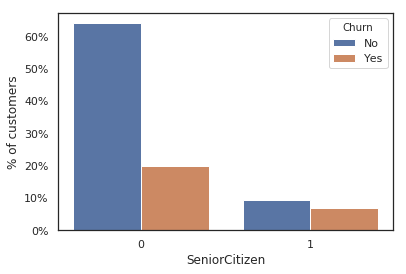

In [16]:
# plot the relationship between churn and population

def barplot_percentages(feature, orient='v', axis_name="% of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
    
barplot_percentages("SeniorCitizen")

Senior citizens ratio of churn to not churning is much higher than the rest of the population. Let's break this down by gender.

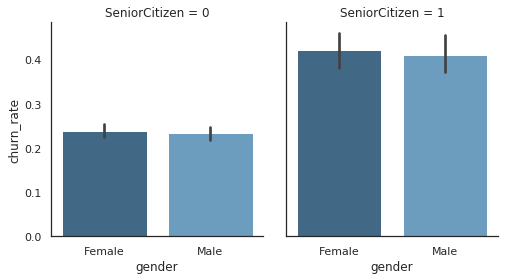

In [17]:
# plot senior citizen and gender vs rest of population
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

From this we can see:
* Gender is not an indicative of churn. 
* SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers. 
* There are no special relations between this categorical values and the main numerical features.

<h3>2.2 Partner and dependents</h3>

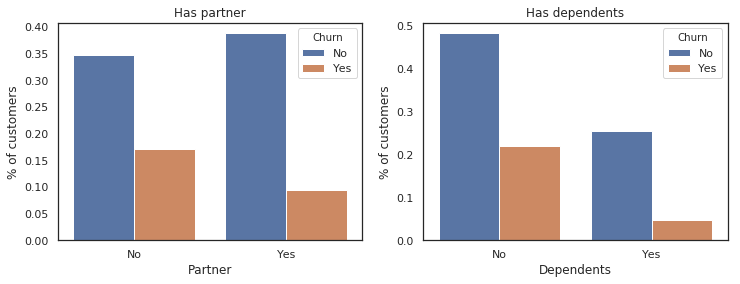

In [18]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "% of customers"

# Plot Partner
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])

# Plot Dependents
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

* Customers that don't have partners are more likely to churn
* Customers without dependents are also more likely to churn

<h3>2.3 Customer Attributes</h3>



### Tenure

Text(0.5, 1.0, '# of Customers by Membership Length')

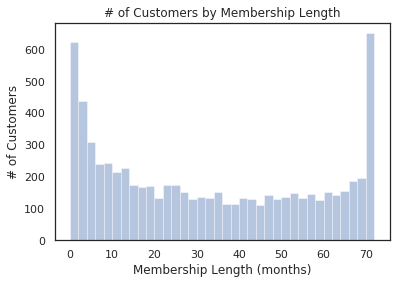

In [19]:
ax = sns.distplot(df['tenure'], 
                  hist=True, 
                  kde=False, 
                  bins=int(180/5))

ax.set_ylabel('# of Customers')
ax.set_xlabel('Membership Length (months)')
ax.set_title('# of Customers by Membership Length')

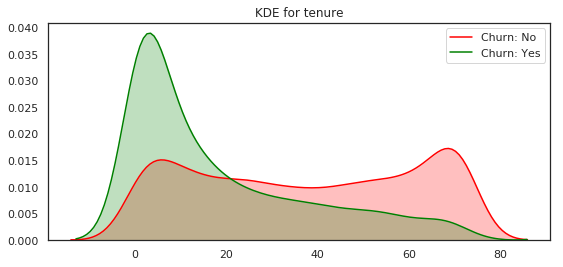

In [20]:
kdeplot('tenure')

A lot of customers have been with the telecom company for just a few months, while the second highest amount has been a member for 72 months or more. This may be due to contract length.

Let's first examine the number of customers churning vs tenure.

Text(0.5, 0, 'Membership Length (months)')

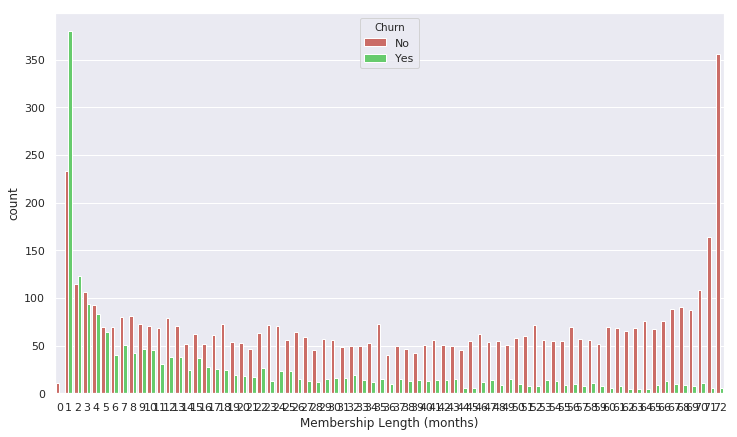

In [21]:
# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(12,7))
ax = sns.countplot(x="tenure", hue="Churn", data=df)
ax.set_xlabel('Membership Length (months)')

The more customers churn in the first month than stay. After month 3  churning customers are lower than staying customers and this decreases every month after that.

### 2.4 Contract Length

Number of customers by contract type.

Text(0.5, 1.0, '# of Customers by Contract Type')

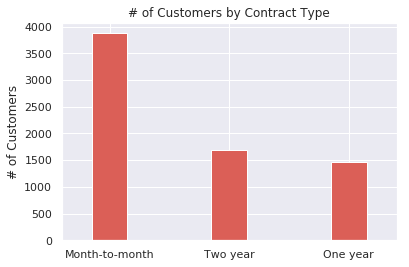

In [22]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Most customers ae on a month-month contract. 

Let's check churn per contract type.

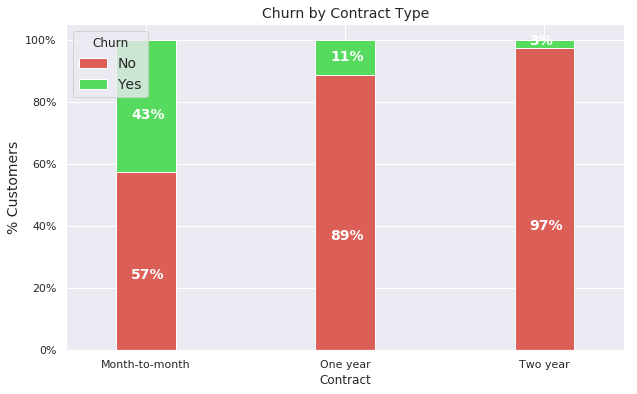

In [23]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

The highest churn rate is month to month customers

### 2.5 Services
<b>Phone services</b>

Customers either have no phone service, one line or multiple lines.

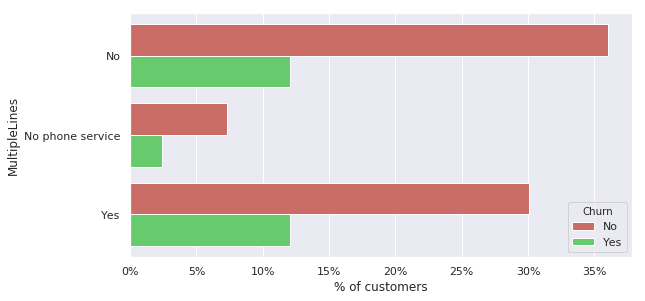

In [24]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

* Around 10% of customers doesn't have phone service
* Customers with multiple lines have a slightly higher % churn rate than those with one line.

Let's see monthly charges:

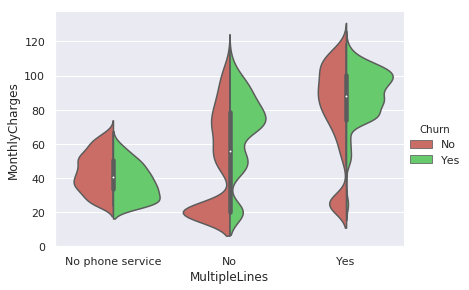

In [25]:
ax = sns.catplot(x="MultipleLines", 
                 y="MonthlyCharges", 
                 hue="Churn", 
                 kind="violin",
                 split=True, 
                 data=df, 
                 height=4.2, 
                 aspect=1.4)

This is really interesting.

* For customers with no phone service the highest churning customers happen at a monthly charge (for broadband only) of around 30 dollars.
* For a single line customer 70 dollars is the point where most will churn
* for multi line customers 70 dollars is also a cut off point.

<b>Internet services</b>

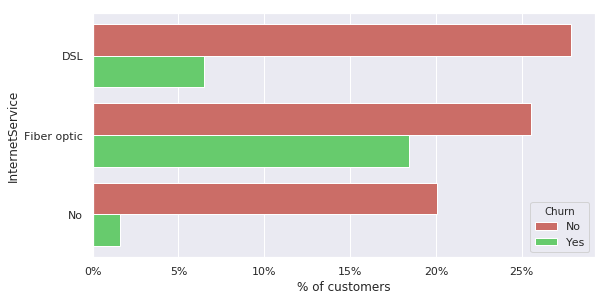

In [26]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

* Clients without internet have a very low churn rate
* Customers with fiber are more probable to churn than those with DSL connection

Comparing the Internet service with monthly charges:

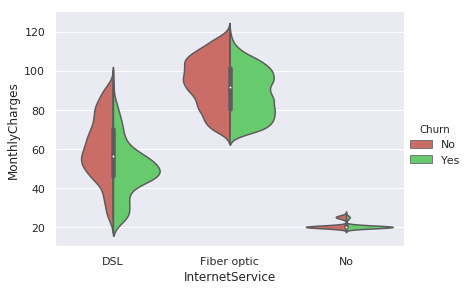

In [27]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, data=df, height=4.2, aspect=1.4);

It's interesting how customers with DSL (slower connection) and higher charges are less probable to churn. 

<h3>2.6 Contract and Payment</h3>

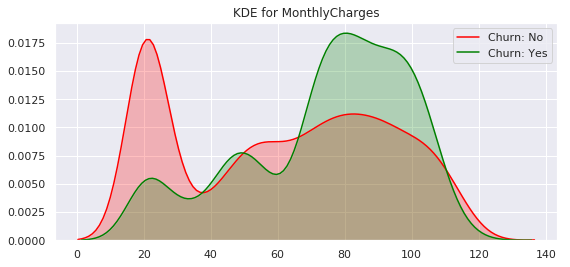

In [28]:
kdeplot('MonthlyCharges')

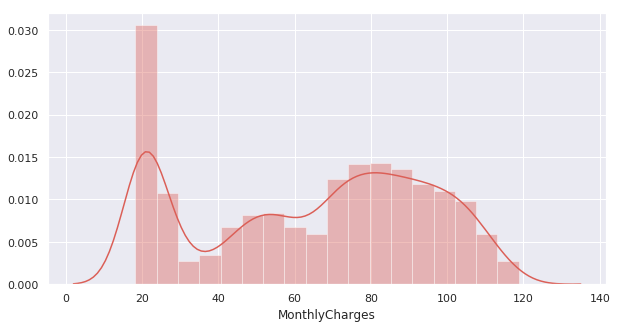

In [29]:
# monthly charges distribution
monthly = df.columns.get_loc("MonthlyCharges")
fig, hist = plt.subplots(figsize=(10,5))
hist = sns.distplot(df.iloc[:, monthly], hist=True)
plt.show()

30% of customers are charged around 20 dollars per month, these must be for no phone service (broadband only) customers. The next highest is 70-90 dollars per month. Let's chart churn vs phone lines.

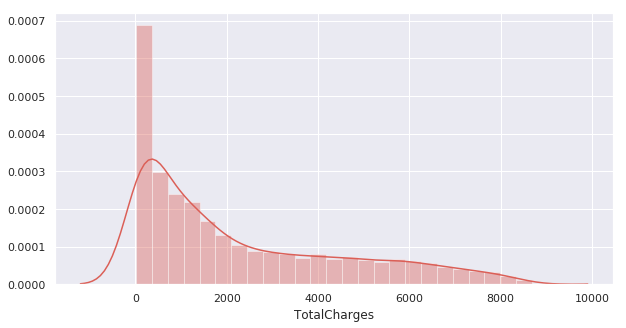

In [30]:
# Total Charges data distribution
yearly = df.columns.get_loc("TotalCharges")

fig, hist = plt.subplots(figsize=(10,5))
histogram = sns.distplot(df.iloc[:, yearly], hist=True)
plt.show()

Over 65% of the total charge is less than 500 dollars.

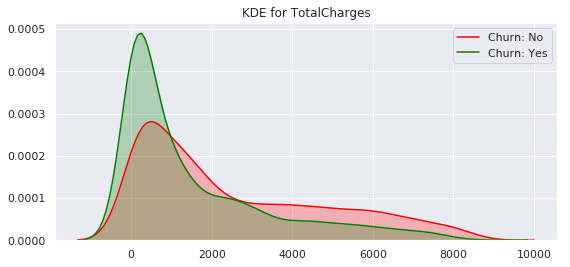

In [31]:
kdeplot('TotalCharges')

Let's boxplot this to. better visualise the atribute range.

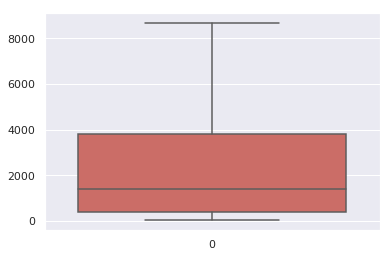

In [32]:
# Attributes destribution
a = sns.boxplot(orient="v", palette="hls", data=df.iloc[:, yearly], fliersize=14)

Chart how the customers are paying vs churn rate

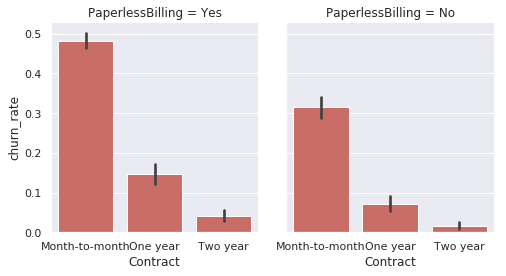

In [33]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", order= ['Month-to-month', 'One year', 'Two year'])

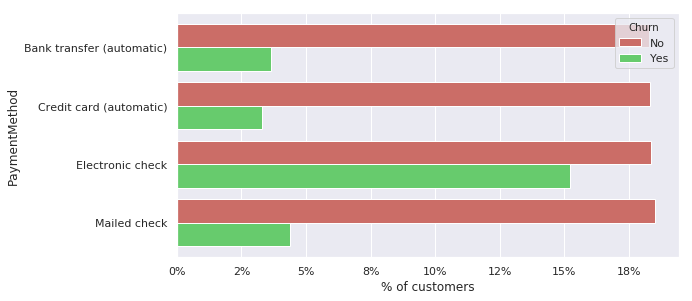

In [34]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

We can see:
* Customers with paperless billing are more probable to churn
* The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
* Short term contracts have higher churn rates

One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. A time-series dataset would be better to understand this kind of behaviour.

<h2>3. Feature Importance</h2>

To get some preliminary feature importances we will use a correlation heatmap.

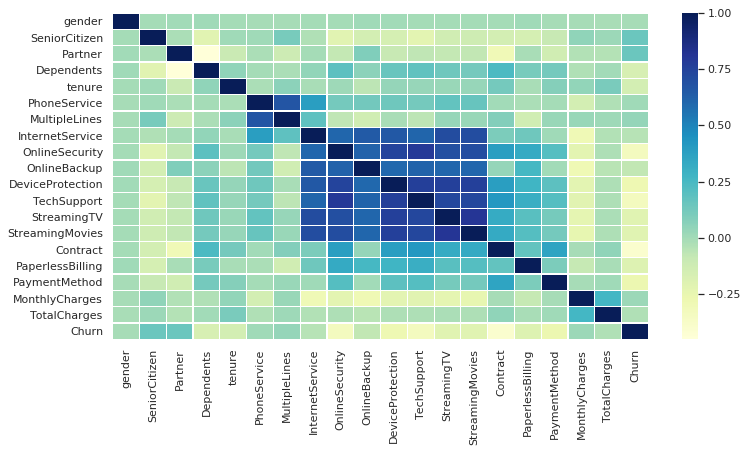

In [36]:
plt.figure(figsize=(12, 6))
df.drop(['customerID', 'churn_rate'],
        axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")